In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
 
import pandas as pd
from sklearn.tree import DecisionTreeRegressor

In [73]:
# URLs of the data and names files
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
names_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names"

In [74]:
df = pd.read_csv("Data/housing.data", delim_whitespace=True, header=None)
col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.columns = col_name
 

C:\Users\yourk\AppData\Local\Temp\ipykernel_8800\982977371.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("Data/housing.data", delim_whitespace=True, header=None)


In [75]:
#Eliminate MEDV to predict the value
col_study = col_name = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'] 
y = df['MEDV']
print(y)


0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [76]:
#Update the columns 
df = df[col_study]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


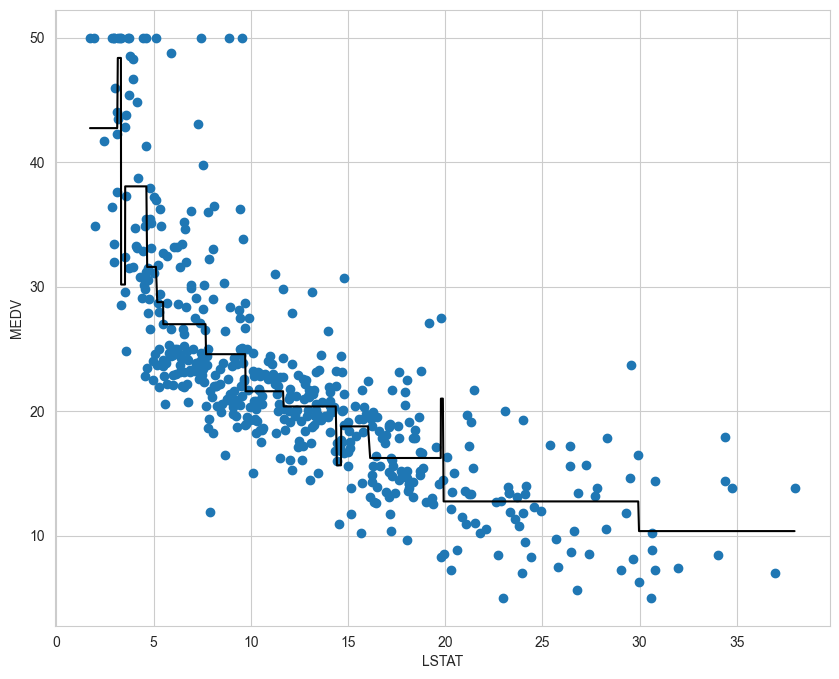

In [77]:
X = df[['LSTAT']].values
tree = DecisionTreeRegressor(max_depth=4)
tree.fit(X, y)
sort_idx = X.flatten().argsort()
plt.figure(figsize=(10,8))
plt.scatter(X[sort_idx], y[sort_idx])
plt.plot(X[sort_idx], tree.predict(X[sort_idx]), color='k')
plt.xlabel('LSTAT')
plt.ylabel('MEDV');

RANDOM FOREST

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor


In [79]:
X = df.values

In [80]:
#Divide the training, X,Y, using a 30% of the test size, the random value before applying
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [81]:
forest = RandomForestRegressor(n_estimators=500, criterion='friedman_mse',
                               random_state=42, n_jobs=-1)

In [82]:
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [83]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred),
             mean_squared_error(y_test, y_test_pred)))
 
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 1.4152, test: 14.6263
R^2 train: 0.9833, test: 0.8243


(152, 13)
(152, 13)


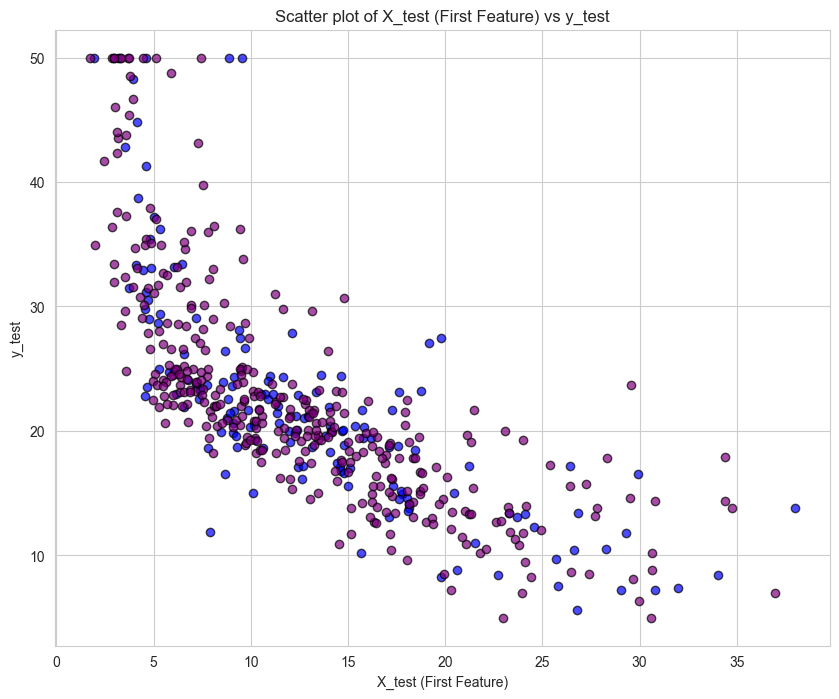

In [108]:
# Checking the shape of X_test to understand its dimensions
print(X_test.shape)
# Checking the shape of X_test to understand its dimensions
print(X_test.shape)

# Select the first feature (column 0) of X_test for comparison
plt.figure(figsize=(10,8))
plt.scatter(X_test[:, 12], y_test, color='blue', edgecolor='k', alpha=0.7)
plt.scatter(X_train[:, 12], y_train, color='purple', edgecolor='k', alpha=0.7)

plt.xlabel('X_test (First Feature)')
plt.ylabel('y_test')
plt.title('Scatter plot of X_test (First Feature) vs y_test')
plt.show()



In [99]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                        n_estimators=500, random_state=42)
ada.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=500, random_state=42)

In [100]:
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)

MSE train: 3.3112, test: 19.0371


In [102]:
print("MSE train: {0:.4f}, test: {1:.4f}".\
      format(mean_squared_error(y_train, y_train_pred),
             mean_squared_error(y_test, y_test_pred)))
 
print("R^2 train: {0:.4f}, test: {1:.4f}".\
      format(r2_score(y_train, y_train_pred),
             r2_score(y_test, y_test_pred)))

MSE train: 3.3112, test: 19.0371
R^2 train: 0.9609, test: 0.7714


<Axes: >

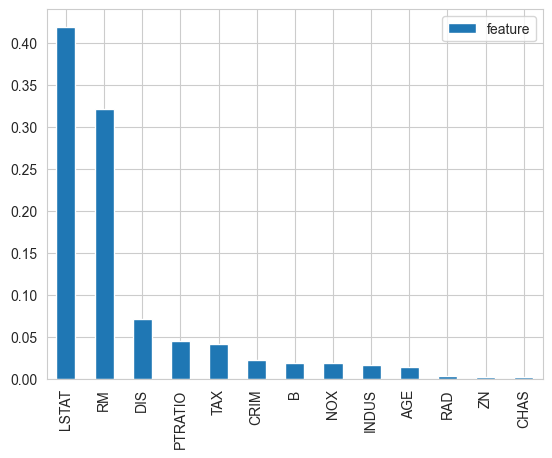

In [106]:
ada.feature_importances_
df.columns
result = pd.DataFrame(ada.feature_importances_, df.columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending=False)
 
result.sort_values(by='feature', ascending=False).plot(kind='bar')